   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  PRICE  
0  296.0     15.3  396.90   4.98   24.0  
1  242.0     17.8  396.90   9.14   21.6  
2  242.0     17.8  392.83   4.03   34.7  
3  222.0     18.7  394.63   2.94   33.4  
4  222.0     18.7  396.90   5.33   36.2  
(506, 15)
Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
Any NaN values? False
Any duplicates? False
     Unnamed: 0     CRIM    ZN  INDUS  CHAS     NOX     RM    AGE   

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(4.944444444444445, 0.5, 'Nr. of homes')

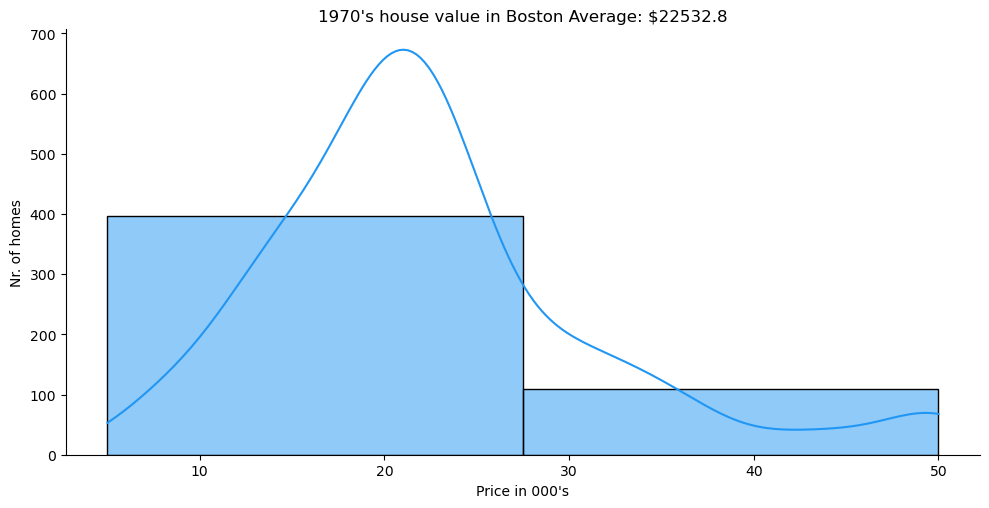

In [11]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm


data = pd.read_csv("boston.csv")
print(data.head())
print(data.shape)
print(data.columns)

print(f'Any NaN values? {data.isna().values.any()}')
print(f'Any duplicates? {data.duplicated().values.any()}')

tax = data["PRICE"].max()
print(data.loc[data["PRICE"] == tax])

print(data.describe())

sns.displot(data["PRICE"],
            bins = 2,
            aspect =2,
            kde=True, 
            color='#2196f3')
            
plt.title(f"1970's house value in Boston Average: ${(1000*data.PRICE.mean()):.6}")
plt.xlabel("Price in 000's")
plt.ylabel("Nr. of homes")


#dISTANCE OF EMPLOYMENT

s.displot(data.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

#No.of rooms 

sns.displot(data.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#Accesilibility to Highways

plt.figure(figsize(10,5), dpi = 200)
plt.hist(data["RAD"],
         bins = 24,
         ec = 'black',
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

river_access = data["CHAS"].value_counts()
bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

#Understand the Relationships in the Data
         
sns.pairplot(data)

# You can even include a regression line
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()


#Distance from Employment vs. Pollution

with sns.axes_style('darkgrid'):
    sns.joinplot(x= data["DIS"],
                 Y = data["NOS"],
                 height=8, 
                 kind='scatter',
                 color='deeppink', 
                 joint_kws={'alpha':0.5})

plt.show()

Target = data["PRICE"]
Features = data.drop("PRICE", axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(Features,
                                                    Target,
                                                    test_size = 0.2,
                                                    random_state = 10)

# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')


regr = LinearRegression()
regr.fit(X_train, Y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')
                                                    

regr_coeff = pd.DataFrame(data= regr.coef_, index = X_train.columns,  columns=['Coefficient'])
print(regr_coeff)

premium = regr.coef_.loc["RM"].values[0] *1000
print(f'The price premium for having an extra room is ${premium:.5}')

predicted_vals = regr.predict(X_train)
residuals = (Y_train - predicted_vals)


plt.figure(dpi = 100)
plt.scatter(x = Y_train, y = predicted_vals,  c='indigo', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

#Using np.log to mak ethe price better

new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')
